In [1]:
from PIL import Image
from ltcl.datasets.physics_dataset import pil_loader, resize_and_crop
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
img = pil_loader('/data/datasets/logs/cmu_wyao/data/physics_ball_5_s1_Ball/raw/0/fig_0.png')

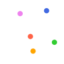

In [81]:
resize_and_crop('train', img, 64, 64)

In [34]:
img = cv.imread('/data/datasets/logs/cmu_wyao/data/physics_ball_5_s1_Ball/raw/0/fig_0.png', cv2.IMREAD_UNCHANGED)

In [65]:
image = cv.imread('/data/datasets/logs/cmu_wyao/data/physics_ball_5_s1_Ball/raw/0/fig_0.png', 0)
img = (image < 255).astype('uint8')
ret, labels = cv2.connectedComponents(img)

(-0.5, 109.5, 109.5, -0.5)

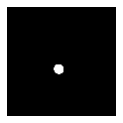

In [84]:
fig = plt.figure(figsize=(2,2))
plt.imshow(labels==3, cmap='gray')
plt.axis('off')

In [230]:
ret, labels = cv2.connectedComponents(img)

In [149]:
def _order_via_matching(self, cur_objs, prev_objs):
    """Order the cur_objs by hungarian matching the to prev_objs.
    Args:
        cur_objs: [(H, W)] List of images
        prev_objs: [(H, W)] List of images
    Returns
        cur_objs, re-sorted using the hungarian matching.
    """
    if len(cur_objs) != len(prev_objs):
        logging.debug('Mismatch in nobj found, not matching...')
        return cur_objs
    num_obj = len(cur_objs)
    if num_obj < 2:
        return cur_objs  # Nothing to sort in this case
    dists = cdist(
        np.stack(cur_objs).reshape((num_obj, -1)) > 0,
        np.stack(prev_objs).reshape((num_obj, -1)) > 0, 'cosine')
    _, prev_ind = linear_sum_assignment(dists)
    res = [None] * num_obj
    for i, p_i in enumerate(prev_ind):
        res[p_i] = cur_objs[i]
    return res

In [ ]:
def labels_to_objs(labels, n_labels):
    objs = [ ]
    for i in range(n_labels):
        

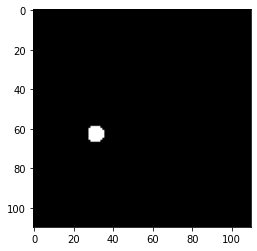

In [171]:
plt.imshow(labels == 4, cmap='gray')

In [127]:
output = cv2.connectedComponentsWithStats((thresh > 0).astype('uint8'), 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

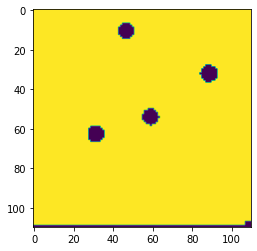

In [212]:
plt.imshow(thresh)

In [225]:
img = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY)[1]  # ensure binary

In [63]:
num_labels, labels_im = cv2.connectedComponents(img)

In [68]:
labels_im

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [64]:
num_labels

2

In [93]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

error: OpenCV(4.5.2) /tmp/pip-req-build-947ayiyu/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


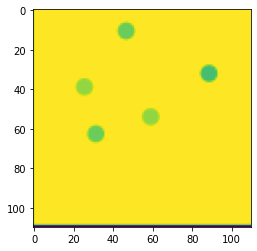

In [18]:
plt.imshow(gray)

In [67]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [28]:
I = [ ]
for x in range(64):
    for y in range(64):
        pixel = img[x,y,:].tolist()
        I.append(tuple(pixel))